In [1]:
#Территория развития пленочной фотографии 

In [47]:
import vk

In [48]:
token = ""  # Сервисный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)  # Авторизация

In [49]:
personal_token = ""  # Персональный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=personal_token)  # Авторизация
vk_personal_api = vk.API(session) #Авторизация

In [50]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [51]:
members = get_members("zonazeleni")

In [52]:
print (len(members))

38873


In [53]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняе

In [54]:
save_members_to_file ("zonazeleni_members", members)

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import pandas as pd

df = pd.read_csv("zonazeleni_members", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [79]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:30] # первые 30 городов
print(city_count)

Moscow              4477
Saint Petersburg    3533
Krasnodar            724
Yekaterinburg        443
Minsk                425
Rostov-on-Don        392
Novosibirsk          313
Nizhny Novgorod      313
Kazan                285
Krasnoyarsk          283
Samara               223
Omsk                 192
Voronezh             189
Ufa                  184
Perm                 171
Tyumen               163
Almaty               162
Chelyabinsk          153
Vladivostok          150
Kaliningrad          145
Saratov              142
Tomsk                141
Izhevsk              135
Simferopol           133
Volgograd            131
Irkutsk              106
Kaluga               105
Yaroslavl             96
Barnaul               92
Khabarovsk            89
Name: city, dtype: int64


In [58]:
sex_count  = df['sex'].value_counts().drop('-')  
print(sex_count)

F    26293
M    12445
Name: sex, dtype: int64


In [59]:
birth_count  = df['birth'].value_counts().drop('-') 
birth_count = birth_count[:20] 
print(birth_count)

2000    1754
2001    1616
1999    1378
2002    1255
1998    1163
1997     812
2003     760
2004     584
1996     573
2005     430
1995     399
2006     313
1994     309
1993     238
1990     179
1992     177
1902     158
1991     156
1988      98
1989      96
Name: birth, dtype: int64


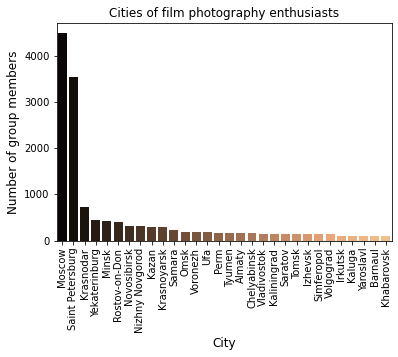

In [60]:
sns.barplot(city_count.index, city_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Cities of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

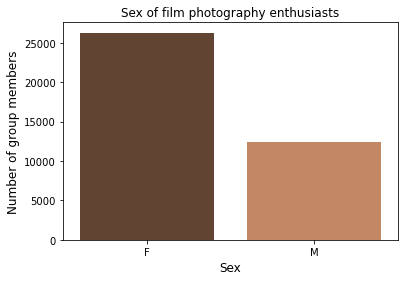

In [61]:
sns.barplot(sex_count.index, sex_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Sex of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.show() # показываем изображение

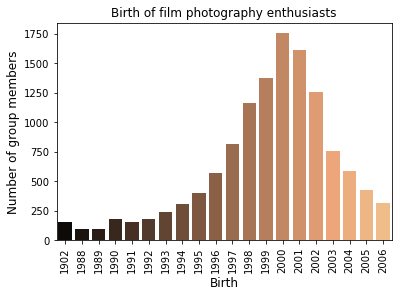

In [62]:
sns.barplot(birth_count.index, birth_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Birth of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('Birth', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

<ipython-input-63-288570bba311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # оставлем тех, кто указал свой возраст


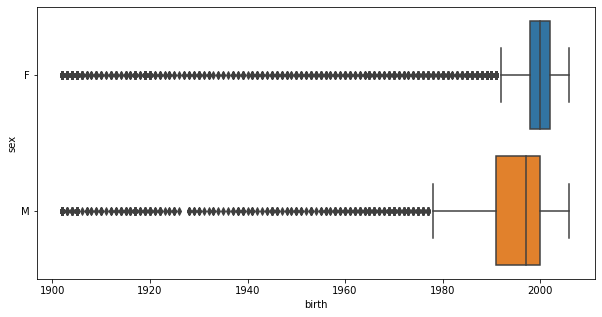

In [63]:
new_df = df[df['sex'].ne('-')] # оставлем тех, кто указал свой пол
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # оставлем тех, кто указал свой возраст
plt.figure(figsize=(10,5)) # размер графика
sns.boxplot(x="birth", y="sex", data=new_df) # строим график

In [66]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"] # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100 # Присваиваем переменной количество тысяч участников
    for i in range(1, count+1): 
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
        return [i['text'] for i in data]

In [67]:
zonazeleni_posts = get_posts("zonazeleni")
print (len(zonazeleni_posts))

200


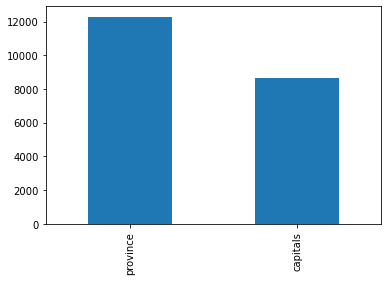

In [68]:
df.loc[(df['city'] == 'Moscow')] = "capitals" 
df.loc[(df['city'] == 'Saint Petersburg')] = "capitals" 
df.loc[(df['city'] == 'Kyiv')] = "capitals" 
df.loc[(df['city'] == 'Minsk')] = "capitals" 
df.loc[(df['city'] == 'Almaty')] = "capitals" 
df.loc[(df['city'] != "capitals") & (df['city'] != "-")] = "province" 
city_count = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-" 
city_count = city_count[:200] 

axes = city_count.plot.bar() # строим график

In [69]:
import vk 

In [70]:
token = "2d8e70992d8e70992d8e7099f72dfa584422d8e2d8e709972fd70596da054fcc3ede5df"  # Сервисный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)  # Авторизация

In [71]:
personal_token = "465843c5fafd5273ca10080981278049bc46ff2c31840bd13dd32902d87b7337274fdebe1bc1024a6f1de"  # Персональный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=personal_token)  # Авторизация
vk_personal_api = vk.API(session) #Авторизация

In [89]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return data

In [93]:
zonazeleni_posts = get_posts ('zonazeleni') 

In [94]:
from datetime import datetime

In [96]:
for i in zonazeleni_posts:
    print(i['text']) #тексты
    
    print('likes:', i['likes']['count']) # количество  лайков
    print('reposts:', i['reposts']['count'])  # количество  репостов
    print('comments:', i['comments']['count'])  # количество  комментариев
    
    date = datetime.fromtimestamp(i['date'])
    print(date.year)
    
    print("==========")

Canon EOS 1v
Canon EF 85 mm f/1.8
Kodak Gold 200
likes: 391
reposts: 4
comments: 16
2020
Ханчжоу, Китай 
ФЭД Микрон 
Kodak Pro Image 
#фэд #фэдмикрон #kodak
likes: 115
reposts: 1
comments: 0
2020
Архыз, сентябрь
Зенит-11
Fujifilm 400 Superia X-TRA
inst: gonkilod
likes: 206
reposts: 3
comments: 2
2020
август-октябрь
Петербург

Canon eos 300 (sigma 30mm 1.4 art)
kodak gold 200
inst: rafaellsio
likes: 169
reposts: 2
comments: 0
2020
fujicolor c200
v. novgorod
inst: petruhito
likes: 179
reposts: 1
comments: 1
2020
Алушта 
Olympus 80g + kodak200
Inst: yalehovitskaya
likes: 292
reposts: 1
comments: 6
2020
kodak kb10
Под Рязанью
likes: 305
reposts: 0
comments: 3
2020
Canon Prima AF-7
likes: 235
reposts: 1
comments: 3
2020
Советский модернизм Тбилиси.

Fujifilm 400
Canon Prima Super 28V 
Inst: kizilpasha
likes: 646
reposts: 16
comments: 0
2020
Стамбул
Olympus Mju ii
Kodak Color Plus 200 и Kodak Ultramax 400
inst.: whois_boris
likes: 241
reposts: 1
comments: 1
2020
Hassel500cm, Portra 160, dslr

In [98]:
with open("zonazeleni_posts.txt", 'w', encoding="utf-8") as f:
    for i in zonazeleni_posts:
        texts = i['text']
        likes = 'likes:', i['likes']['count']
        reposts = 'reposts:', i['reposts']['count']
        comments = 'comments:', i['comments']['count']
        date = datetime.fromtimestamp(i['date'])
        year = date.year 
        f.write (str(texts)+"\n" + str(likes) +"\n"+ str(reposts)+"\n"+ str(comments)+"\n"+ str(date)+"\n"+ str(year)+"\n" + "========="+"\n")

In [99]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/julianalevina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [100]:
for i in zonazeleni_posts:
    year = 'likes:', i['likes']['count']

In [101]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [102]:
with open("zonazeleni_posts.txt", 'r', encoding='utf-8') as f:
    texts = f.read().lower()

In [103]:
words = word_tokenize(texts)
print (len(words))

134450


In [104]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words)

In [105]:
words = [i for i in words if i.isalnum()]
print (len(words))

46227


In [106]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    

In [107]:
clean_words = [word for word in words if word not in stop_words]

In [108]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words)

In [109]:
clean_words = [word for word in words if word not in stop_words]

In [110]:
print(f"Было: {len(words)}, Стало: {len(clean_words)}")

Было: 46227, Стало: 37519


In [111]:
count_words = Counter(clean_words).most_common(50)
print (count_words)

[('0', 3627), ('2018', 1700), ('2019', 1223), ('kodak', 1158), ('200', 1099), ('2020', 953), ('olympus', 757), ('inst', 752), ('400', 708), ('canon', 548), ('fuji', 438), ('mju', 408), ('color', 351), ('fujicolor', 286), ('fujifilm', 264), ('plus', 259), ('c200', 257), ('ii', 242), ('superia', 221), ('nikon', 219), ('zenit', 207), ('зенит', 203), ('zoom', 194), ('100', 193), ('eos', 176), ('minolta', 154), ('пленка', 141), ('pentax', 139), ('ilford', 138), ('colorplus', 132), ('gold', 131), ('superzoom', 120), ('portra', 114), ('prima', 109), ('11', 101), ('iii', 99), ('привет', 95), ('samsung', 89), ('agfa', 82), ('instagram', 81), ('konica', 81), ('trip', 78), ('super', 77), ('ultramax', 74), ('35', 72), ('af', 72), ('35mm', 71), ('mini', 67), ('122', 65), ('плёнка', 64)]


In [115]:
def save_words_to_file(filename, count_words):
    with open(filename, 'w', encoding="utf-8") as f:
        for word_name in words:
            f.write(f"{word_name}\n")

In [116]:
save_words_to_file ("zonazeleni_popularwords.txt", count_words)

In [117]:
zonazeleni_films =  "('kodak', 1155), ('fuji', 438), ('mju', 408), ('minolta', 154), ('ilford', 138), ('portra', 114)"
print (zonazeleni_films)

('kodak', 1155), ('fuji', 438), ('mju', 408), ('minolta', 154), ('ilford', 138), ('portra', 114)


In [120]:
def save_words_to_file(filename, zonazeleni_films):
    with open(filename, 'w', encoding="utf-8") as f:
        for word_name in zonazeleni_films:
            f.write(f"{word_name}")

In [121]:
save_words_to_file ("zonazeleni_films.txt", zonazeleni_films)

In [122]:
zonazeleni_years =  "('2018', 1700), ('2019', 1223), ('2020', 953)"
print (zonazeleni_years)

('2018', 1700), ('2019', 1223), ('2020', 953)


In [123]:
save_words_to_file ("zonazeleni_years.txt", zonazeleni_years)

In [126]:
zonazeleni_cameras =  "('olympus', 757), ('canon', 548), ('nikon', 219), ('zenit', 207), ('зенит', 203), ('pentax', 139), ('samsung', 89)"
print (zonazeleni_cameras)

('olympus', 757), ('canon', 548), ('nikon', 219), ('zenit', 207), ('зенит', 203), ('pentax', 139), ('samsung', 89)


In [127]:
save_words_to_file ("zonazeleni_cameras.txt", zonazeleni_cameras)

In [124]:
with open ("besporyadokitehnologia_members", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
with open ("zonazeleni_members", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
with open ("tritaplenka_members.txt", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")
with open ("plenka_predlozhka_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")

In [125]:
members1 = set(members1)
members2 = set(members2)
members3 = set(members3)
members4 = set(members4)

In [126]:
united_members = members1.union(members2).union(members3).union(members4)
print(len(united_members))

337368


In [127]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [128]:
save_members_to_file ("unitedmembers.tsv", members)

In [129]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)
print(len(intersected_members))

51
